#### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score

#### Load the csv files

In [2]:
df = pd.read_csv("rotten_tomatoes_movies.csv")

In [3]:
df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


#### Audience rating range from 0 to 100

In [4]:
print(df['audience_rating'].sort_values().unique())

[  0.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.
  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.
  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.
  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100.
  nan]


#### Map the rating to the specific range

In [5]:
criteria = [
df['audience_rating'].between(0, 10), 
df['audience_rating'].between(11, 20), 
df['audience_rating'].between(21, 30),
df['audience_rating'].between(31, 40),
df['audience_rating'].between(41, 50),
df['audience_rating'].between(51, 60),
df['audience_rating'].between(61, 70),
df['audience_rating'].between(71, 80),
df['audience_rating'].between(81, 90),
df['audience_rating'].between(91, 100)
]
values = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['rating_range'] = np.select(criteria, values, 0)

In [6]:
print(df['rating_range'].value_counts())

71-80     3062
61-70     2738
81-90     2680
51-60     2417
41-50     2307
31-40     1849
21-30     1107
91-100     785
11-20      416
0          296
0-10        55
Name: rating_range, dtype: int64


#### Our goal of the model is predicting the following Tomatometer Status

In [7]:
print(df['tomatometer_status'].unique())

['Rotten' 'Certified-Fresh' 'Fresh' nan]


In [8]:
# Filter out the movie with short runtime
df_movie = df.query("runtime > 60")

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

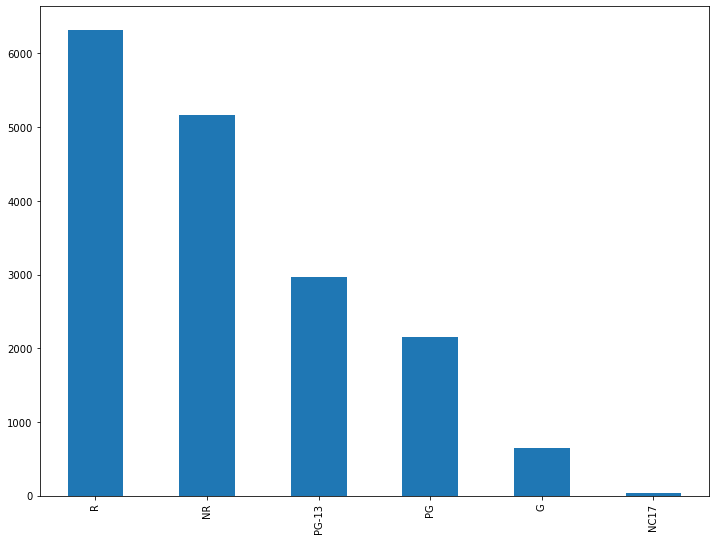

In [9]:
# Visualize the distribution of each category in content_rating feature
ax = df_movie.content_rating.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

#### Movie counts by the average rating from audience

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

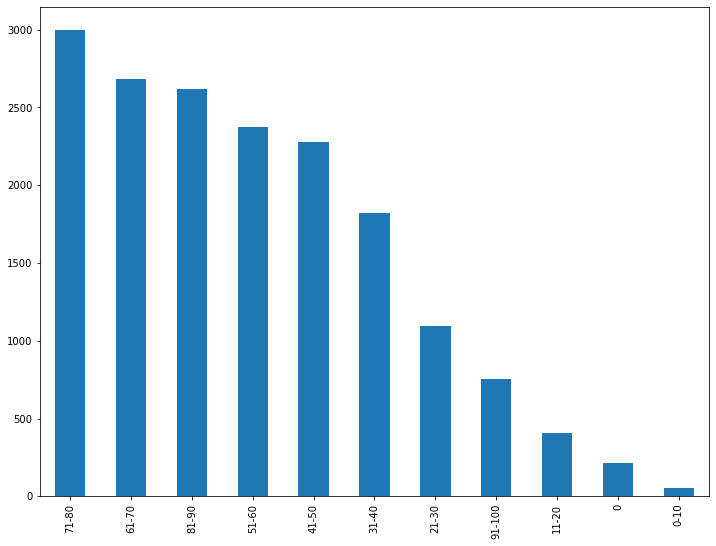

In [10]:
ax = df_movie.rating_range.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

#### Most of the rating are rotten

([<matplotlib.axis.XTick at 0x142a90c6d60>,
 [Text(0, 0, 'rotten'), Text(1, 0, 'fresh'), Text(2, 0, 'certified-fresh')])

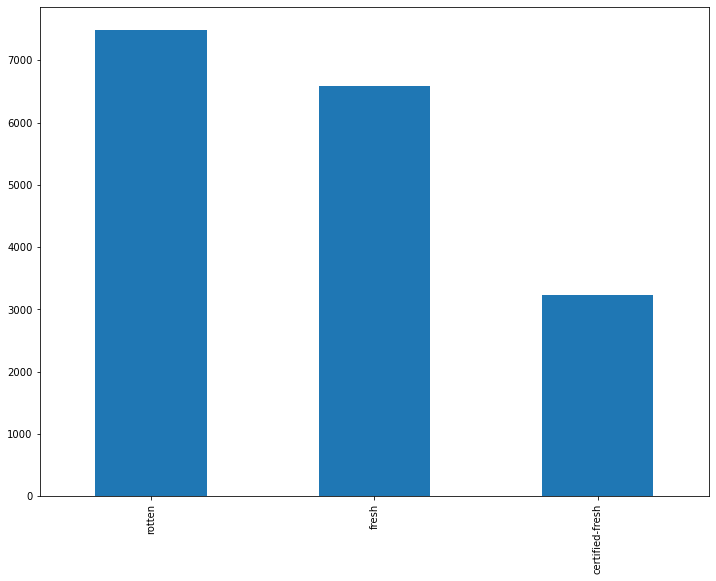

In [12]:
ax = df_movie.tomatometer_status.value_counts().plot(kind='bar', figsize=(12,9))

x_ticks = [0,1,2]
x_labels = ['rotten', 'fresh', 'certified-fresh']
plt.xticks(ticks=x_ticks, labels=x_labels)

#### One-hot encoding the columns for training the ML model

In [13]:
content_rating = pd.get_dummies(df_movie.content_rating)
content_rating.head()

,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0


#### Convert the categorical columns to numerical labels

In [14]:
df_movie.audience_status.value_counts()

Upright    9178
Spilled    7756
Name: audience_status, dtype: int64

In [15]:
audience_status = pd.DataFrame(df_movie.audience_status.replace(['Spilled','Upright'],[0,1]))
audience_status.head()

,audience_status
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


In [16]:
df_movie.tomatometer_status.value_counts()

Rotten             7478
Fresh              6581
Certified-Fresh    3226
Name: tomatometer_status, dtype: int64

In [17]:
tomatometer_status = pd.DataFrame(df_movie.tomatometer_status.replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))
tomatometer_status.head()

,tomatometer_status
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0


#### Create feature table and split to training and testing dataset

In [18]:
training_feature = pd.concat([df_movie[[
'runtime',
'tomatometer_rating',
'tomatometer_count',
'audience_rating',
'audience_count',
'tomatometer_top_critics_count',
'tomatometer_fresh_critics_count',
'tomatometer_rotten_critics_count'
]], content_rating, audience_status, tomatometer_status], axis = 1).dropna()

In [19]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(training_feature.drop(['tomatometer_status'], axis=1), training_feature.tomatometer_status, test_size= 0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13539 and the size of test data is 3385


#### Train the model

In [20]:
# Create random forest classifier
random_forest = RandomForestClassifier(random_state=2)

# Using training data to train the model
random_forest.fit(X_train, y_train)

# Predict the tomatometer status by injecting the test data to the aboved trained tree classifier  
y_predict = random_forest.predict(X_test)

#### Accuracy and the report

Accuracy: 0.9881831610044313
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1543
         1.0       0.98      0.99      0.98      1241
         2.0       0.97      0.96      0.97       601

    accuracy                           0.99      3385
   macro avg       0.98      0.98      0.98      3385
weighted avg       0.99      0.99      0.99      3385



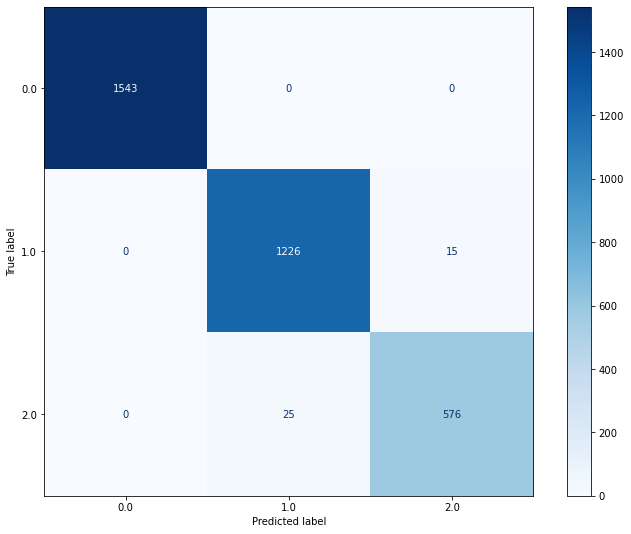

In [21]:
# accuracy and classification report on test data
print('Accuracy:',accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot confusion matrix on test data
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(random_forest, X_test, y_test, cmap ='Blues', ax=ax)

#### Determine each of the feature importance 

In [22]:
# Retrieve feature importance of each column
feature_importance = random_forest.feature_importances_

In [23]:
# Print feature importance
for i, feature in enumerate(X_train.columns):
    print(f'{feature} = {feature_importance[i]}')

runtime = 0.005705083929547118
tomatometer_rating = 0.4908281927169775
tomatometer_count = 0.0983108996393043
audience_rating = 0.05461073891834652
audience_count = 0.017466561184017685
tomatometer_top_critics_count = 0.03198580907440833
tomatometer_fresh_critics_count = 0.1475711439585686
tomatometer_rotten_critics_count = 0.11274289413916008
G = 0.00024292039929187348
NC17 = 4.98517912014611e-05
NR = 0.008601230820576993
PG = 0.000505632633829966
PG-13 = 0.002496151811027971
R = 0.0021213155647962834
audience_status = 0.02676157341894542


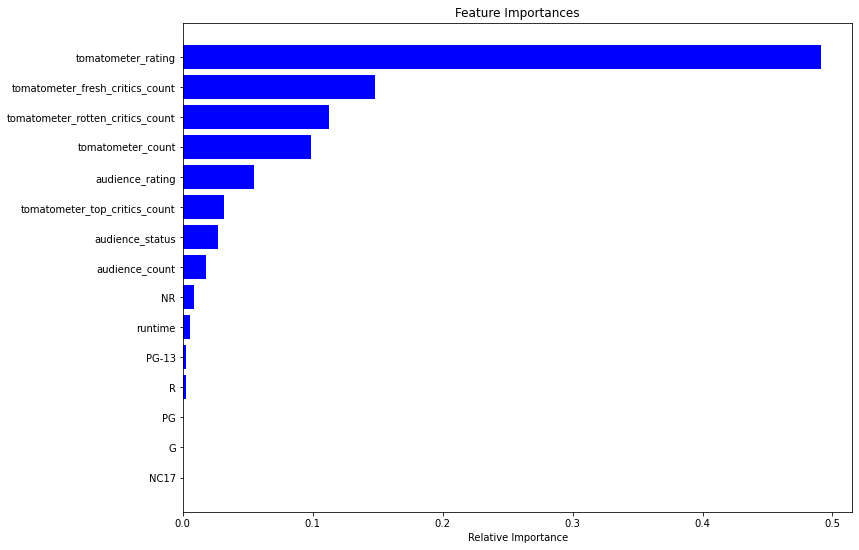

In [24]:
# Plot the graph to see the importance of each features
indices = np.argsort(feature_importance)

plt.figure(figsize=(12,9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Drop the content rating features and retrain the model

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
training_feature.drop(['tomatometer_status', 'NR', 'PG-13', 'R', 'PG','G', 'NC17'], axis=1),
training_feature.tomatometer_status, 
test_size= 0.2, random_state=42)

print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13539 and the size of test data is 3385


Accuracy: 0.9887740029542097
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1543
         1.0       0.98      0.99      0.98      1241
         2.0       0.98      0.96      0.97       601

    accuracy                           0.99      3385
   macro avg       0.99      0.98      0.98      3385
weighted avg       0.99      0.99      0.99      3385



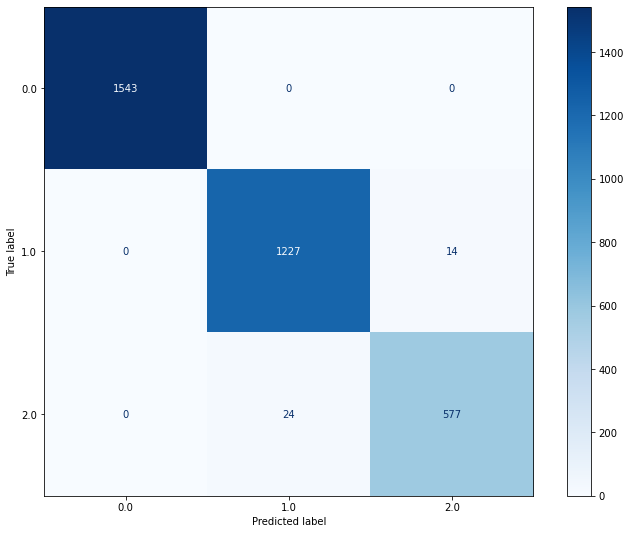

In [26]:
# Create random forest classifier
random_forest = RandomForestClassifier(random_state=2)

# Using training data to train the model
random_forest.fit(X_train, y_train)

# Predict the tomatometer status by injecting the test data to the aboved trained tree classifier  
y_predict = random_forest.predict(X_test)

# accuracy and classification report on test data
print('Accuracy:',accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot confusion matrix on test data
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(random_forest, X_test, y_test, cmap ='Blues', ax=ax)